<a href="https://colab.research.google.com/github/paulocavalin/mitpe-ml/blob/main/src/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

### Load tik tac toe dataset

In [4]:
!wget -cv https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data

--2023-05-22 13:47:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25866 (25K) [application/x-httpd-php]
Saving to: ‘tic-tac-toe.data’

tic-tac-toe.data    100%[===================>]  25.26K  --.-KB/s    in 0.1s    

2023-05-22 13:47:16 (196 KB/s) - ‘tic-tac-toe.data’ saved [25866/25866]



In [5]:
df = pd.read_csv('tic-tac-toe.data')

In [6]:
df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [7]:
 df.loc[df.positive == 'positive'].count()

x           625
x.1         625
x.2         625
x.3         625
o           625
o.1         625
x.4         625
o.2         625
o.3         625
positive    625
dtype: int64

In [8]:
 df.loc[df.positive == 'negative'].count()

x           332
x.1         332
x.2         332
x.3         332
o           332
o.1         332
x.4         332
o.2         332
o.3         332
positive    332
dtype: int64

### Extract data columns

In [10]:
X = df.loc[:, df.columns != 'positive'].to_numpy()

In [11]:
X

array([['x', 'x', 'x', ..., 'o', 'x', 'o'],
       ['x', 'x', 'x', ..., 'o', 'o', 'x'],
       ['x', 'x', 'x', ..., 'o', 'b', 'b'],
       ...,
       ['o', 'x', 'o', ..., 'x', 'o', 'x'],
       ['o', 'x', 'o', ..., 'x', 'o', 'x'],
       ['o', 'o', 'x', ..., 'o', 'x', 'x']], dtype=object)

### Extract label column

In [12]:
Y = df['positive']

In [13]:
Y

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
952    negative
953    negative
954    negative
955    negative
956    negative
Name: positive, Length: 957, dtype: object

## Convert CATEGORICAL features to 1-HOT-ENCODING

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')

In [16]:
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [17]:
enc.categories_

[array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object)]

In [18]:
X_1hot = enc.transform( X ).toarray()

In [19]:
X_1hot

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [20]:
X[3]

array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b'], dtype=object)

In [21]:
X_1hot[3]

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

## Split data set into train and test sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1hot, Y, test_size=0.33, random_state=42)

## Train classifiers 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression(random_state=0)

In [26]:
clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
Y_test[:10]

835    negative
477    positive
350    positive
890    negative
854    negative
261    positive
215    positive
334    positive
86     positive
908    negative
Name: positive, dtype: object

In [29]:
y_pred[:10]

array(['negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative'],
      dtype=object)

### Predict the probability of positive winning

In [30]:
unseen_X = enc.transform([['x', 'o', 'b',  
                           'x', 'o', 'x', 
                           'b', 'o', 'b']])

print(clf.predict(unseen_X))
print(clf.predict_proba(unseen_X))

['negative']
[[0.74145624 0.25854376]]


## Evaluation metrics

### Compute accuracy

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(Y_test, y_pred)

0.9746835443037974

### Evaluate model with cross validation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
scores = cross_val_score(clf, X_1hot, Y, cv=10)

In [38]:
clf.fit(X_1hot, Y)

LogisticRegression()

In [34]:
scores

array([0.97916667, 1.        , 0.98958333, 1.        , 1.        ,
       0.96875   , 0.98958333, 1.        , 1.        , 0.83157895])

In [35]:
np.mean(scores)

0.9758662280701754

### Compute ROC AUC score

In [36]:
from sklearn.metrics import roc_auc_score

In [40]:
clf.predict_proba(X_1hot)

array([[0.39894841, 0.60105159],
       [0.26333762, 0.73666238],
       [0.20104068, 0.79895932],
       ...,
       [0.39749716, 0.60250284],
       [0.1530677 , 0.8469323 ],
       [0.1530677 , 0.8469323 ]])

In [41]:
clf.predict_proba(X_1hot)[:, 1]

array([0.60105159, 0.73666238, 0.79895932, 0.84730726, 0.7981908 ,
       0.79895932, 0.73907995, 0.7981908 , 0.88821872, 0.84993141,
       0.88774347, 0.91004345, 0.84614557, 0.91080701, 0.93551344,
       0.95295538, 0.9352246 , 0.93551344, 0.91181723, 0.9352246 ,
       0.73707159, 0.6037996 , 0.73888209, 0.80079592, 0.84878577,
       0.80003266, 0.88087657, 0.84052595, 0.80079592, 0.841777  ,
       0.80003266, 0.88135688, 0.91344575, 0.88935282, 0.85138897,
       0.88888179, 0.93664963, 0.91333224, 0.88935282, 0.91407053,
       0.88888179, 0.93692116, 0.95475332, 0.91333224, 0.85138897,
       0.91407053, 0.93793456, 0.95475332, 0.93765585, 0.93511349,
       0.91128426, 0.93482299, 0.79973932, 0.74001666, 0.79897303,
       0.88018117, 0.83963788, 0.79973932, 0.84089457, 0.79897303,
       0.8806639 , 0.91292169, 0.83963788, 0.74001666, 0.84089457,
       0.88246773, 0.91292169, 0.88197128, 0.91280755, 0.85055064,
       0.91354988, 0.93754863, 0.9544669 , 0.9372683 , 0.93754

In [42]:
y_prob = clf.predict_proba(X_1hot)[:, 1]

In [43]:
roc_auc_score(Y, y_prob)

0.9943710843373493

### Show confusion matrix

In [44]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)

In [46]:
cm 

array([[ 99,   3],
       [  5, 209]])

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

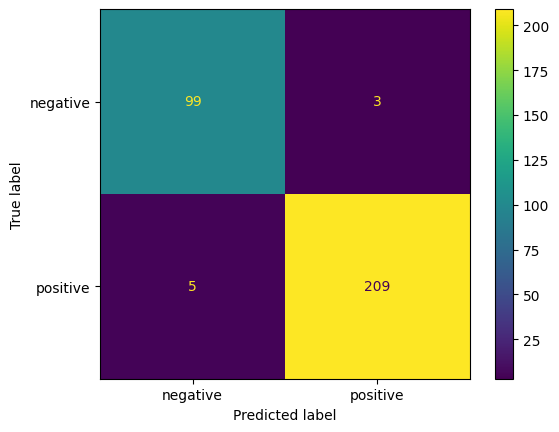

In [48]:
disp.plot()

### Wrap last steps into a function

In [49]:
def train_and_evaluate_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
    print(f'Accuracy: {accuracy_score(Y_test, y_pred)}')
    
    y_probs = clf.predict_proba(X_test)[:, 1]
    print(f'ROC AUC score: {roc_auc_score(Y_test, y_probs)}')
    
    cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

Accuracy: 0.9746835443037974
ROC AUC score: 0.9953271028037384


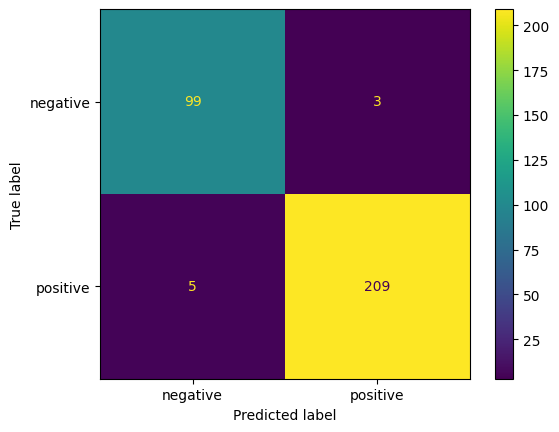

In [50]:
train_and_evaluate_classifier( LogisticRegression(random_state=0), X_train, Y_train, X_test, Y_test)

Accuracy: 0.8924050632911392
ROC AUC score: 0.9408786879237676


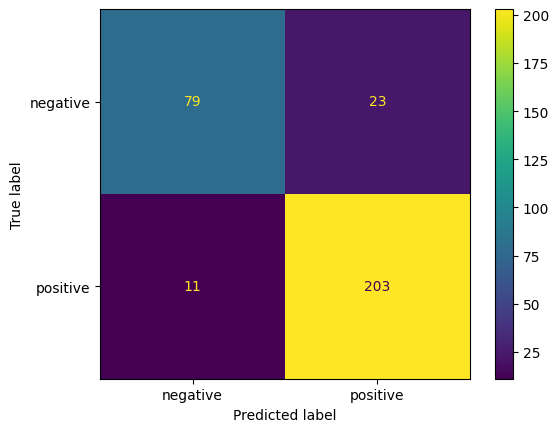

In [51]:
from sklearn.neighbors import KNeighborsClassifier

train_and_evaluate_classifier( KNeighborsClassifier(n_neighbors=3), X_train, Y_train, X_test, Y_test)

Accuracy: 0.819620253164557
ROC AUC score: 0.7718984790177753


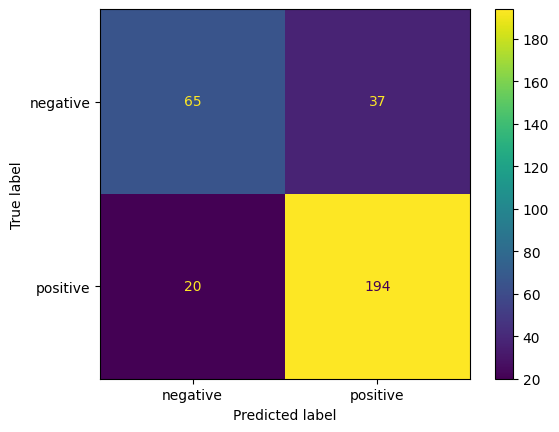

In [52]:
train_and_evaluate_classifier( KNeighborsClassifier(n_neighbors=1), X_train, Y_train, X_test, Y_test)